# BDT 

##### author: G. Räuber, 2024


## Content

In this notebook, we will follow several steps:
* Read a dataset (created with dataset/create_pkl.py)
* Apply a BDT trained separately
* Plot the output


### Read dataset

Read the Dataset that we created


In [1]:
# Look what is the name of your .pkl file
!ls ../dataset

create_pkl.py          dataset_2classes_2.pkl
dataset_2classes.pkl   figures


In [2]:
# Read the Dataframe:
import pandas as pd
df=pd.read_pickle('../dataset/dataset_2classes_2.pkl')

# Print the Dataframe
print(df)

              a         b          c    d         e         f    g         h  \
0      5.422735  1.294476  25.344766  472  0.220693  1.084394  244  1.327170   
1      5.230961  1.865375  18.115212  517  6.067707  0.949532  226  1.646190   
2      6.989023  0.004058  18.042798  489  5.364052  0.129856  233  2.198825   
3      4.730476 -1.745070  21.200347  514  5.358172  0.910126  243  1.594229   
4      8.241837  2.420643   8.975838  516  4.576160  2.094501  248  1.453769   
...         ...       ...        ...  ...       ...       ...  ...       ...   
99995  5.094527  0.196066  17.852030  517  1.027752  0.663796  244  2.743563   
99996  8.465458  0.478518  25.407836  479  0.551162  0.442243  222  1.001722   
99997  5.725134  1.306830  22.652548  478  1.424515  0.738830  248  0.648758   
99998  8.004729 -0.235217  12.060777  502  0.878653  0.044133  216  0.953797   
99999  6.753483  0.218647   2.628925  497  1.339768  0.888563  250  0.853363   

              i         j  dataset  wei

### Features

Make sure that the features used to determine the BDT method are stored in the Dataframe

In [3]:
# Print the columns of your dataset
cols=list(df.columns)
print(cols)

# Set of features used for the BDT
feats=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

# Define the weight
wei='weight'

for fe in feats:
    assert fe in cols

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'dataset', 'weight']


### Test and training sets

Definition of the test and training sets. 

The size of the test set depends on the size of the sample itself. 
Since the default size is 100000, 30% seems a good amount.

In [4]:
import numpy as np 

#dataframe containing all features
X=df.to_numpy()

#vector added to the dataframe with the two categories specified
y=np.ones(df.shape[0])

##select weights for the bdt
X_apply_we=X[:,list(df.columns).index(wei)]

#select here the features relevant for the BDT
#not before because the events are shuffled
X_apply=X[:,:-2]



### Fit BDT

Call the method determined by `bdt.ipynb`, and apply it on this sample



In [5]:
# Look what is the name of your file
!ls .

BDT_method.pkl                  dataset_2classes_2_basicBDT.pkl
Classifier_stack_lin.pdf        dataset_2classes_basicBDT.pkl
apply_bdt.ipynb                 figures
bdt.ipynb


In [6]:
import pickle

# Call method
method=pickle.load(open('BDT_method.pkl', "rb"))

# Get prediction from method
decision_X=method.predict_proba(X_apply)[:,1]



### BDT output

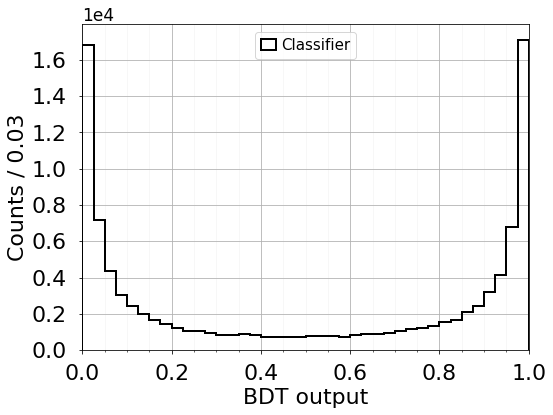

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
from matplotlib.ticker import MultipleLocator

def plot_classifier(list_y_predicted, nb_bins, col, lab, lab_loc, yaxis,
                    filename,
                    plots_size=(8, 6), yax='Counts', al=0.6, all_fontsize=22, leg_fontsize=15, 
                    weights=[], edgecol=None, x_range=[0, 1]):
    
    fig, ax=plt.subplots(figsize=plots_size)
    
    if not weights: weights=len(list_y_predicted)*[None]
    
    low, high=x_range
    histdiv=(high-low)/nb_bins

    plt.hist(list_y_predicted[0], color=col[0], range=[low, high], bins=nb_bins, histtype='step', 
             label=lab[0], linewidth=2, weights=weights[0])
    
    if len(list_y_predicted)>1:
        plt.hist(list_y_predicted[1:], color=col[1:], range=[low, high], bins=nb_bins, histtype='stepfilled', 
                 label=lab[1:], linewidth=1, weights=weights[1:], alpha=al, stacked=True, edgecolor=edgecol)
        
    plt.xlabel("BDT output", fontsize=all_fontsize)
    plt.ylabel(yax+' / %0.2f'%(histdiv), fontsize=all_fontsize)
    plt.legend(loc=lab_loc, fontsize=leg_fontsize, handlelength=1, handletextpad=0.3, labelspacing=0.3)
    plt.xticks(fontsize=all_fontsize)
    plt.yticks(fontsize=all_fontsize)
    
    ax.xaxis.set_major_locator(MultipleLocator(0.2))
    ax.xaxis.set_minor_locator(MultipleLocator(0.05))
    
    ax.set_xlim(x_range)
    ax.set_yscale(yaxis)
    if yaxis=='log': 
        ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=5))
    elif yaxis=='linear': 
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        t=ax.yaxis.get_offset_text()
        t.set_fontsize(all_fontsize-5)
    for em in ax.xaxis.get_majorticklabels(): em.set_y(-0.02)
    for em in ax.yaxis.get_majorticklabels(): em.set_x(-0.02)
        
    ax.set_axisbelow(True)
    ax.grid(which='major', axis='both')
    ax.grid(which='minor', axis='both', color='whitesmoke')
    
    if filename: plt.savefig(f"{filename}.pdf", bbox_inches='tight')




leg_class=['Classifier']

plot_classifier([decision_X], 40, ['black'], 
                leg_class, 'upper center', 'linear', 'Classifier_stack_lin', 
                weights=[X_apply_we])



### Save the Dataframe with the BDT output saved as a column

In [8]:
# Add the BDT output column
df['Basic_BDT_output']=method.predict_proba(df[df.columns[:-2]])[:,1].tolist()

# Print the Dataframe
print(df)

# Save the Dataframe
pickle.dump(df, open(f'dataset_2classes_2_basicBDT.pkl', "wb"))

              a         b          c    d         e         f    g         h  \
0      5.422735  1.294476  25.344766  472  0.220693  1.084394  244  1.327170   
1      5.230961  1.865375  18.115212  517  6.067707  0.949532  226  1.646190   
2      6.989023  0.004058  18.042798  489  5.364052  0.129856  233  2.198825   
3      4.730476 -1.745070  21.200347  514  5.358172  0.910126  243  1.594229   
4      8.241837  2.420643   8.975838  516  4.576160  2.094501  248  1.453769   
...         ...       ...        ...  ...       ...       ...  ...       ...   
99995  5.094527  0.196066  17.852030  517  1.027752  0.663796  244  2.743563   
99996  8.465458  0.478518  25.407836  479  0.551162  0.442243  222  1.001722   
99997  5.725134  1.306830  22.652548  478  1.424515  0.738830  248  0.648758   
99998  8.004729 -0.235217  12.060777  502  0.878653  0.044133  216  0.953797   
99999  6.753483  0.218647   2.628925  497  1.339768  0.888563  250  0.853363   

              i         j  dataset  wei